Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4369 - loss: -0.3915 - val_accuracy: 0.4598 - val_loss: -0.8793
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4583 - loss: 0.5595 - val_accuracy: 0.4598 - val_loss: -1.2071
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5026 - loss: -2.9985 - val_accuracy: 0.5172 - val_loss: -12.0097
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6002 - loss: -16.8734 - val_accuracy: 0.6207 - val_loss: -21.8956
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5894 - loss: -26.9533 - val_accuracy: 0.5977 - val_loss: -26.2359
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6654 - loss: -27.4248 - val_accuracy: 0.6322 - val_loss: -38.0541
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5912 - loss: -47.4315 - val_accuracy: 0.4598 - val_loss: -41.3513
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5350 - loss: -48.9813 - 

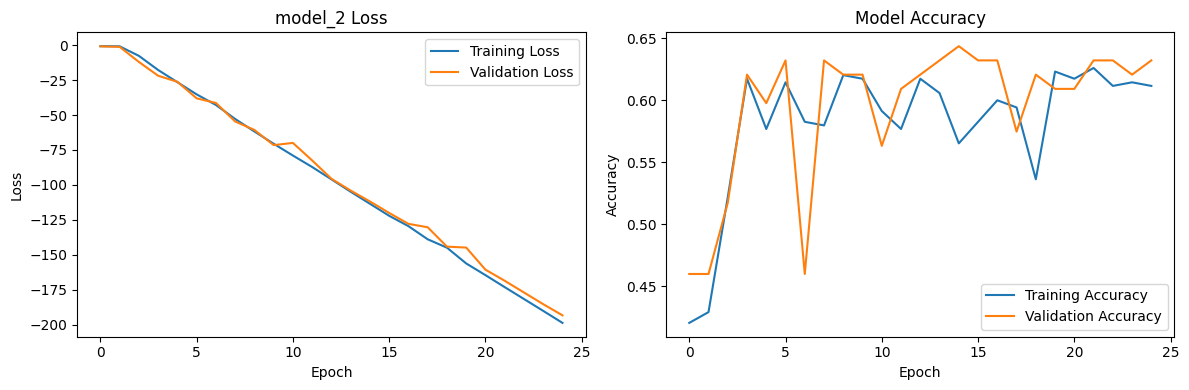

In [64]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Dataset.csv')


data.loc[data["Class"] == "L", "Class"] = 0
data.loc[data["Class"] == "M", "Class"] = 1
data.loc[data["Class"] == "H", "Class"] = 2
##display(data)
##print(data.columns)

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Apply OneHotEncoder to categorical features
categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 
                       'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']


encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_columns])


# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])


# Combine scaled numerical and encoded categorical features
X_preprocessed = np.hstack((X_scaled, X_encoded))




# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, random_state=42)

# Convert the labels into float32 (binary classification scenario)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

def create_model(optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    
    # Hidden layer
    x = tf.keras.layers.Dense(1000, activation='sigmoid')(inputs)
    tf.keras.layers.Dropout(0.3),  # Dropout layer with 50% rate
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    
    # Hidden layer
    x1 = tf.keras.layers.Dense(1000, activation='sigmoid')(x)
    tf.keras.layers.Dropout(0.3),  # Dropout layer with 50% rate
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Hidden layer
    x2 = tf.keras.layers.Dense(1000, activation='sigmoid')(x1)
    tf.keras.layers.Dropout(0.3),  # Dropout layer with 50% rate
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x2)
    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Set the optimizer with the given learning rate
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    
    # Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define the model
model =create_model() 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True
)
#model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=5, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test ,batch_size=2)
print(f"Test Accuracy: {test_acc:.4f}")


# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

